## Practice
1. Input simple textures from image files.
2. Use cv2.getPerspectiveTransform() to get Homography Matrix by specifing 4 pairs of corresponding points.
3. Use cv2.warpPerspective() to get projective views of the textures.
4. Use cv2.add() to combine the projective textures to make a 3D room.
5. Upload your Jupyter code file (*.ipynb)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

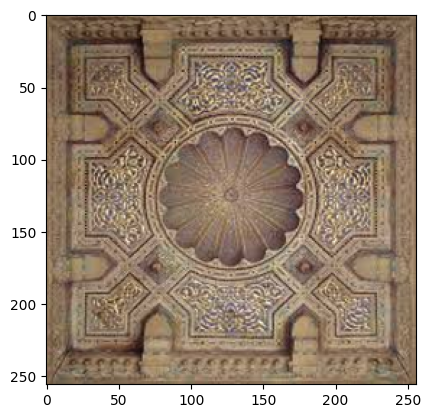

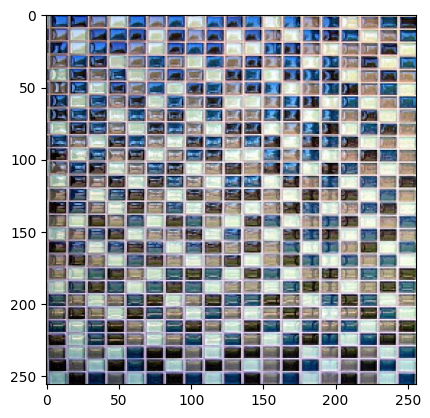

In [2]:
# Load the images and resize them
img1 = cv2.imread('tile_texture7.jpg')
img2 = cv2.imread('tile_texture9.jpg')

# Resize both images to 256x256 pixels using cubic interpolation
img1 = cv2.resize(img1, (256, 256), interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, (256, 256), interpolation=cv2.INTER_CUBIC)

# Get the dimensions of the second image (rows and columns)
rows, cols = img2.shape[:2]

# Get the dimensions of the first image (cell_rows and cell_cols)
cell_rows, cell_cols = img1.shape[:2]

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

# Perspective Transformation

Perspective transformation maps points from one plane to another using a projective transformation matrix. The process fundamentally alters the geometry of the image to mimic a new perspective.

## General Formula

For transforming a point $(x, y)$ to a new point $(x', y')$ using a perspective transformation matrix $H$, we use the formula:

$$
\begin{bmatrix}
x' \\
y' \\
w'
\end{bmatrix}
=
H \cdot
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

Where $H$ is a $3 \times 3$ matrix:

$$
H =
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}
$$

Post-transformation, the coordinates $(x', y')$ are obtained by normalizing with $w'$:

$$
x' = \frac{x'}{w'}, \quad y' = \frac{y'}{w'}
$$

## Source Points

The source points `src_points` are the corners of the original image, corresponding to:

$$
src_points =
\begin{bmatrix}
h_{0} & h_{0} \\
h_{cols - 1} & h_{0} \\
h_{0} & h_{rows - 1} \\
h_{cols - 1} & h_{rows - 1} 
\end{bmatrix}
$$

These points correspond to the top-left, top-right, bottom-left, and bottom-right corners of the image.

## Destination Points

Destination points are defined based on the type of transformation:

- **Right Transformation:**

$$
\text{dst\_points\_right} = \left[
\begin{matrix}
0.7 \times \text{cols} & 0.3 \times \text{rows} \\
cols - 1   & 0 \\
0.7 \times \text{cols} & 0.7  \times \text{rows} \\
cols - 1  & rows - 1 
\end{matrix}
\right]
$$


- **Leaf Transformation:**

$$
\text{dst\_points\_leaf} = \left[
\begin{matrix}
0 & 0  \\
0.3  \times \text{cols} & 0.3  \times \text{rows} \\
0  & rows - 1  \\
0.3 \times \text{cols} & 0.7  \times \text{rows}
\end{matrix}
\right]
$$


- **Up Transformation:**

$$
\text{dst\_points\_up} = \left[
\begin{matrix}
0  & 0  \\
cols - 1  & 0  \\
0.3 \times \text{cols} & 0.3 \times \text{rows} \\
0.7 \times \text{cols} & 0.3 \times \text{rows}
\end{matrix}
\right]
$$


- **Down Transformation:**
$$
\text{dst\_points\_down} = \left[
\begin{matrix}
0.3 \times \text{cols} & 0.7 \times \text{rows} \\
0.7  \times \text{cols} & 0.7 \times \text{rows} \\
0  & rows - 1  \\
cols - 1  & rows - 1 
\end{matrix}
\right]
$$

## Calculating the Transformation Matrices

For each set of destination points, the perspective transformation matrix $H$ is calculated using `cv2.getPerspectiveTransform(src_points, dst_points)`. This function computes the $3 \times 3$ matrix $H$ that maps the source points to the destination points.

## Applying the Transformation

The image is warped using the transformation matrix $H$ with `cv2.warpPerspective(img, H, (cols, rows), flags=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT, borderValue=0)`. This operation applies the transformation matrix to each pixel in the original image, mapping it to its new position in the output image.

## Summary

The process involves defining source and destination points, calculating the transformation matrix $H$ for each set of points, and applying this matrix to warp the image, thus showcasing various perspective transformations based on the defined destination points.

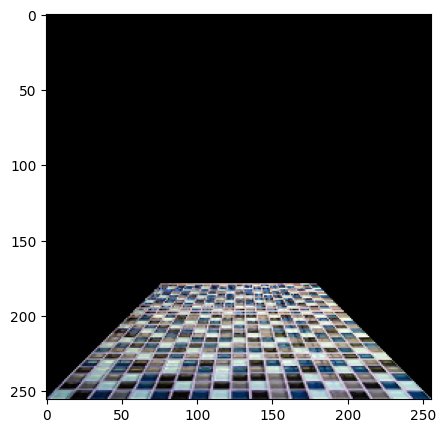

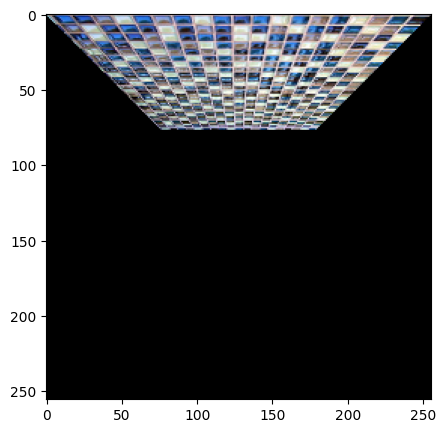

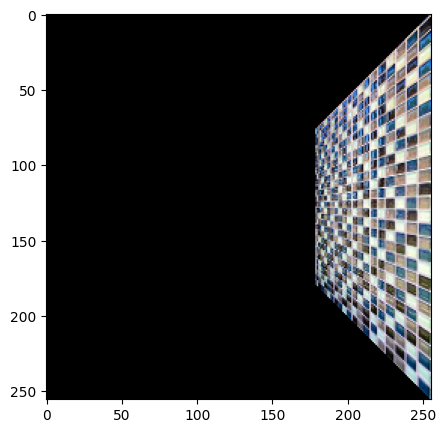

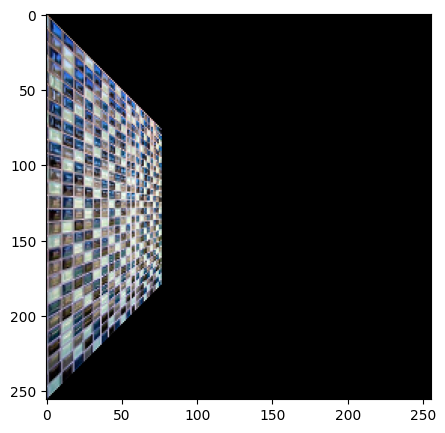

In [3]:
# Define the source points (corners of the original image)
src_points = np.float32([
    [0, 0],  # Top-left corner
    [cols - 1, 0],  # Top-right corner
    [0, rows - 1],  # Bottom-left corner
    [cols - 1, rows - 1]  # Bottom-right corner
])

# Define the destination points for various transformations
dst_points_right = np.float32([
    [int(0.7 * cols), int(0.3 * rows)],  # Adjusted top-left corner
    [cols - 1, 0],  # Top-right corner remains the same
    [int(0.7 * cols), int(0.7 * rows)],  # Adjusted bottom-left corner
    [cols - 1, rows - 1]  # Bottom-right corner remains the same
])

dst_points_leaf = np.float32([
    [0, 0],  # Top-left corner remains the same
    [int(0.3 * cols), int(0.3 * rows)],  # Adjusted top-right corner
    [0, rows - 1],  # Bottom-left corner remains the same
    [int(0.3 * cols), int(0.7 * rows)]  # Adjusted bottom-right corner
])

dst_points_up = np.float32([
    [0, 0],  # Top-left corner remains the same
    [cols - 1, 0],  # Top-right corner remains the same
    [int(0.3 * cols), int(0.3 * rows)],  # Adjusted bottom-left corner
    [int(0.7 * cols), int(0.3 * rows)]  # Adjusted bottom-right corner
])

dst_points_down = np.float32([
    [int(0.3 * cols), int(0.7 * rows)],  # Adjusted top-left corner
    [int(0.7 * cols), int(0.7 * rows)],  # Adjusted top-right corner
    [0, rows - 1],  # Bottom-left corner remains the same
    [cols - 1, rows - 1]  # Bottom-right corner remains the same
])

# Calculate the projective transformation matrices
projective_matrix_right = cv2.getPerspectiveTransform(src_points, dst_points_right)
projective_matrix_leaf = cv2.getPerspectiveTransform(src_points, dst_points_leaf)
projective_matrix_up = cv2.getPerspectiveTransform(src_points, dst_points_up)
projective_matrix_down = cv2.getPerspectiveTransform(src_points, dst_points_down)

# Apply the perspective transformation to the image using the calculated matrices
img_output_right = cv2.warpPerspective(img2, projective_matrix_right, (cols, rows), flags=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT, borderValue=0)
img_output_leaf = cv2.warpPerspective(img2, projective_matrix_leaf, (cols, rows), flags=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT, borderValue=0)
img_output_up = cv2.warpPerspective(img2, projective_matrix_up, (cols, rows), flags=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT, borderValue=0)
img_output_down = cv2.warpPerspective(img2, projective_matrix_down, (cols, rows), flags=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

# Display the transformed images using Matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img_output_down, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img_output_up, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img_output_right, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img_output_leaf, cv2.COLOR_BGR2RGB))
plt.show()

# Source and Destination Points

## Source Points for Celling Transformation
The source points are the corners of the original cell image, which is resized to 256x256 pixels:

$$
\text{src\_celling\_points} = \left[ 
\begin{matrix}
0 & 0 \\
\text{cell\_cols} - 1 & 0 \\
0 & \text{cell\_rows} - 1 \\
\text{cell\_cols} - 1 & \text{cell\_rows} - 1
\end{matrix}
\right]
=
\left[ 
\begin{matrix}
0 & 0 \\
255 & 0 \\
0 & 255 \\
255 & 255
\end{matrix}
\right]
$$

## Destination Points for Celling Transformation
The destination points specify where the corners of the original cell image will be mapped in the transformed image:

$$
\text{dst\_celling\_points} = \left[ 
\begin{matrix}
0.3 \times \text{cols} & 0.3 \times \text{rows} \\
0.7 \times \text{cols} & 0.3 \times \text{rows} \\
0.3 \times \text{cols} & 0.7 \times \text{rows} \\
0.7 \times \text{cols} & 0.7 \times \text{rows}
\end{matrix}
\right]
=
\left[ 
\begin{matrix}
0.3 \times 256 & 0.3 \times 256 \\
0.7 \times 256 & 0.3 \times 256 \\
0.3 \times 256 & 0.7 \times 256 \\
0.7 \times 256 & 0.7 \times 256
\end{matrix}
\right]
=
\left[ 
\begin{matrix}
77 & 77 \\
179 & 77 \\
77 & 179 \\
179 & 179
\end{matrix}
\right]
$$

## Perspective Transformation Matrix
The perspective transformation matrix \(H\) is computed to map the source points to the destination points. This matrix is a 3x3 matrix, which performs the transformation:

$$
H = \text{cv2.getPerspectiveTransform}(\text{src\_celling\_points}, \text{dst\_celling\_points})
$$

## Applying the Transformation
The transformation matrix \(H\) is applied to the cell image \(\text{img1}\) to obtain the transformed image \(\text{combine}\):

$$
\text{combine} = \text{cv2.warpPerspective}(\text{img1}, H, (\text{cell\_cols}, \text{cell\_rows}), \text{flags} = \text{cv2.INTER\_AREA}, \text{borderMode} = \text{cv2.BORDER\_CONSTANT}, \text{borderValue} = 0)
$$

In mathematical terms, this means that each point \((x, y)\) in the source image \(\text{img1}\) is mapped to a new point \((x', y')\) in the transformed image \(\text{combine}\) according to the transformation matrix \(H\):

$$
\begin{bmatrix}
x' \\
y' \\
w'
\end{bmatrix}
=
H \cdot
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

After transformation, the coordinates \((x', y')\) are normalized by dividing by \(w'\):

$$
x' = \frac{x'}{w'}, \quad y' = \frac{y'}{w'}
$$

## Combining Images

The transformed cell image is combined with the other transformed images using pixel-wise addition. This operation overlays the images as follows:

```python
result = cv2.add(combine, img_output_right)
result = cv2.add(result, img_output_leaf)
result = cv2.add(result, img_output_up)
result = cv2.add(result, img_output_down)



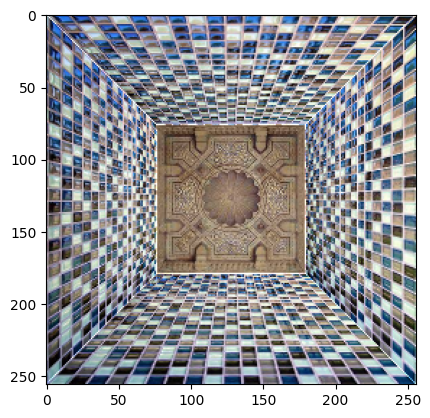

In [4]:
# Define the source points for the celling transformation (corners of the cell image)
src_celling_points = np.float32([
    [0, 0],  # Top-left corner
    [cell_cols - 1, 0],  # Top-right corner
    [0, cell_rows - 1],  # Bottom-left corner
    [cell_cols - 1, cell_rows - 1]  # Bottom-right corner
])

# Define the destination points for the celling transformation
dst_celling_points = np.float32([
    [int(0.3 * cols), int(0.3 * rows)],  # Adjusted top-left corner
    [int(0.7 * cols), int(0.3 * rows)],  # Adjusted top-right corner
    [int(0.3 * cols), int(0.7 * rows)],  # Adjusted bottom-left corner
    [int(0.7 * cols), int(0.7 * rows)]  # Adjusted bottom-right corner
])

# Calculate the projective transformation matrix for the celling points
cell_matrix = cv2.getPerspectiveTransform(src_celling_points, dst_celling_points)

# Apply the perspective transformation to the cell image
combine = cv2.warpPerspective(img1, cell_matrix, (cell_cols, cell_rows), flags=cv2.INTER_AREA, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

# Combine the transformed cell image with the other transformed images using addition
result = cv2.add(combine, img_output_right)
result = cv2.add(result, img_output_leaf)
result = cv2.add(result, img_output_up)
result = cv2.add(result, img_output_down)

# Display the final combined image using Matplotlib
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()